In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

In [142]:
#Problem Statement:
# in this data we have one independent variable (Features) "Hours of Study" and one dependent variable (Target) "Marks".
#You have to train a SVR model to understand the relationship between "Hours of Study" and "Marks" of the students to predict the marks of the students based on their hours dedicated to study.

In [143]:
df = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/SampleData.csv')

In [144]:
# EDA: Exploratory Data Analysis

In [145]:
df.head()

,Hours of Study,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours of Study  100 non-null    float64
 1   Marks           100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [147]:
df.describe()

,Hours of Study,Marks
count,100.000000,100.000000
mean,48.958341,72.035051
std,9.746379,15.200087
min,25.128485,31.707006
25%,41.526164,60.788586
50%,49.634970,72.179542
75%,56.762631,83.215080
max,70.346076,99.051415


In [148]:
#change colum name 
df.rename(columns={'Hours of Study': 'Hours', 'Marks': 'Marks'}, inplace=True)

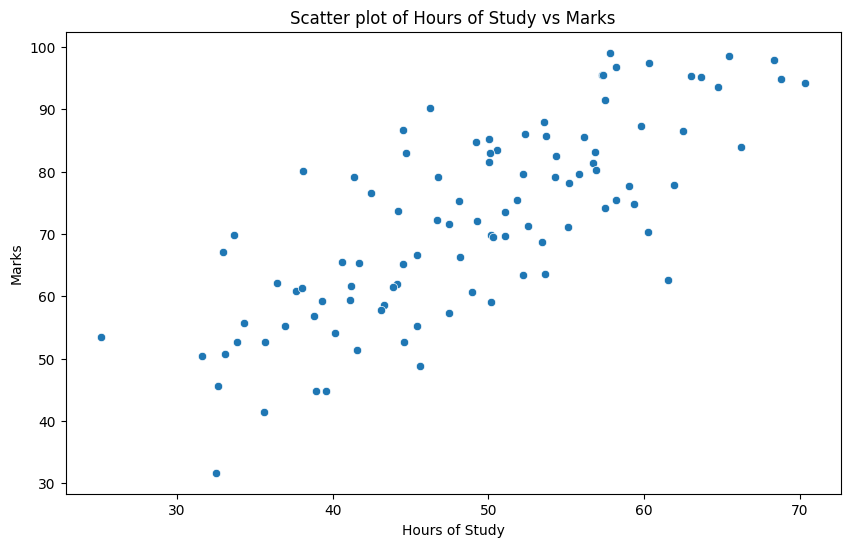

In [149]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours', y='Marks', data=df)
plt.title('Scatter plot of Hours of Study vs Marks')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()
# positive correlation , as the hours of study increases, marks also increases


In [150]:
df.corr()

,Hours,Marks
Hours,1.00000,0.76477
Marks,0.76477,1.00000


<Axes: >

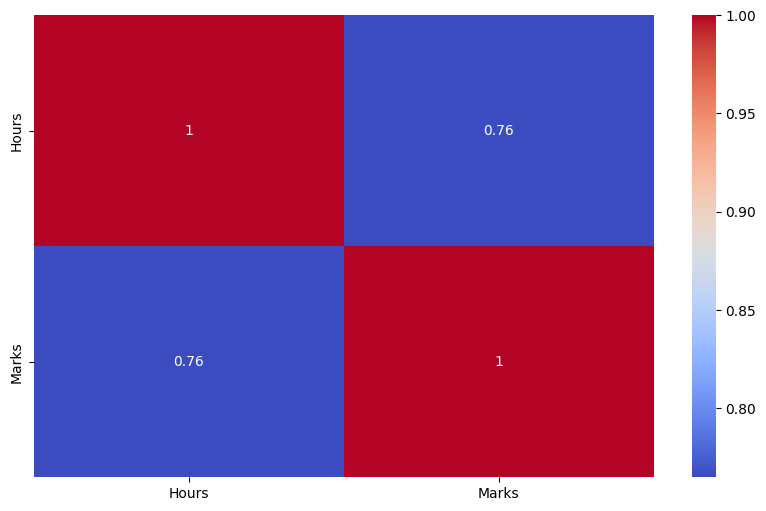

In [151]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

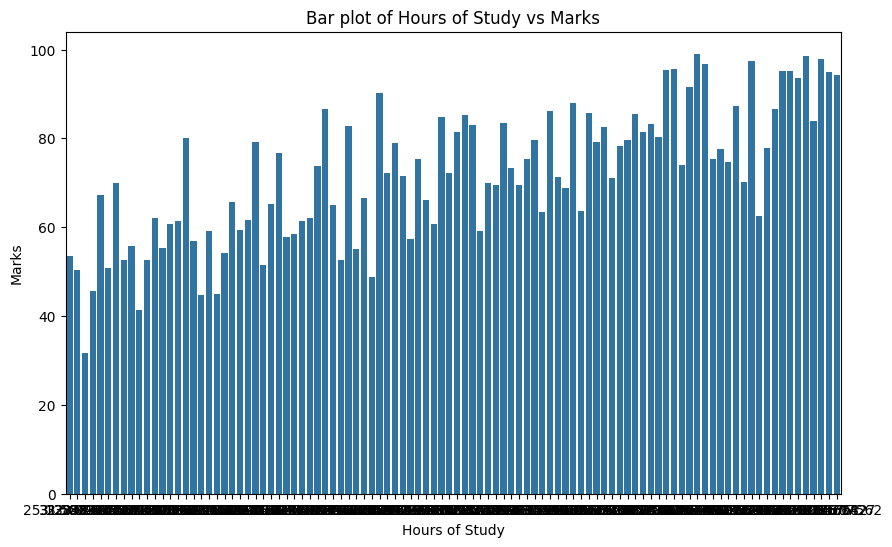

In [152]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Hours', y='Marks', data=df)
plt.title('Bar plot of Hours of Study vs Marks')
plt.xlabel('Hours of Study')
plt.ylabel('Marks')
plt.show()

In [153]:
# Machine Learning Model
X = df[['Hours']]
y = df['Marks']

In [154]:
# Scaling and Preprocessing
from sklearn.preprocessing import StandardScaler

In [155]:
# Scaling is the process of normalizing the range of independent variables or features of data.
#for example, in this case, we will scale the 'Hours' and 'Marks' columns to have a mean of 0 and a standard deviation of 1.
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

X = X_scaled
y = y_scaled


In [156]:
print(X_scaled[:5])
print(y_scaled[:5])

[[-1.69692744]
 [ 0.46078382]
 [ 1.29641497]
 [-0.15289487]
 [ 1.119344  ]]
[[-2.66651176]
 [-0.21538463]
 [-0.62633786]
 [-0.03229448]
 [ 1.00475931]]


In [157]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


In [158]:
X_train.shape

(80, 1)

In [159]:
from sklearn.svm import SVR

In [160]:
model = SVR(kernel='rbf')

In [161]:
model.fit(X_train, y_train)

C:\Users\Vipul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [162]:
df

,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [163]:
y_pred = model.predict(X_test)

In [164]:
y_pred

array([-0.76947139,  0.62495329, -0.36605346, -1.26283815,  0.57381597,
       -0.1185472 , -0.75664008, -0.40417142, -0.99623181,  0.95262628,
        1.07387222,  0.35030893, -0.56328734, -0.52093818,  0.07543078,
        1.22551728,  1.33758452,  0.67596748, -0.56967027, -0.64786557])

In [165]:
# Fit the scaler to y and use it for inverse transformation
y_scaler = StandardScaler()
y_scaler.fit(y)  # y is already available and is 2D
y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred

array([[-0.76947139],
       [ 0.62495329],
       [-0.36605346],
       [-1.26283815],
       [ 0.57381597],
       [-0.1185472 ],
       [-0.75664008],
       [-0.40417142],
       [-0.99623181],
       [ 0.95262628],
       [ 1.07387222],
       [ 0.35030893],
       [-0.56328734],
       [-0.52093818],
       [ 0.07543078],
       [ 1.22551728],
       [ 1.33758452],
       [ 0.67596748],
       [-0.56967027],
       [-0.64786557]])

In [166]:
y_test = y_scaler.inverse_transform(y_test.reshape(-1, 1))

Text(0, 0.5, 'Predicted Marks')

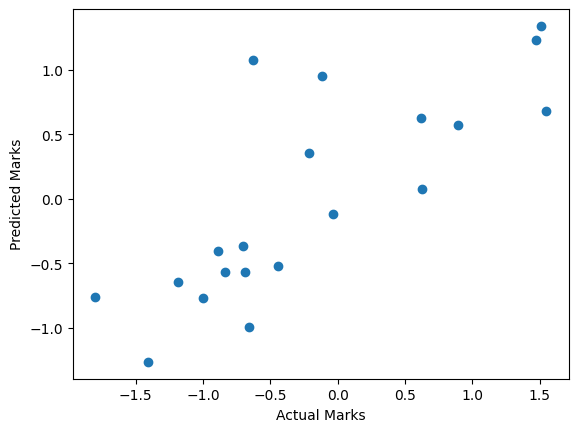

In [167]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Marks')
plt.ylabel('Predicted Marks')

In [168]:
# Predicting the marks for a student who studies for 5 hours
X_input = scaler_X.transform([[1]])
y_pred_scaled = model.predict(X_input)  # Still in scaled form
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))  # Back to real marks

print("Predicted marks for 5 hours of study:", y_pred_original[0][0])

Predicted marks for 5 hours of study: 71.48972755589703


C:\Users\Vipul\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [170]:
model.score(X_test, y_test)

0.5943071038285548

In [171]:
r2_score(y_test, y_pred)

0.5943071038285547

In [172]:
mean_absolute_error(y_test, y_pred)

0.45844190856602396

In [173]:
mean_squared_error(y_test, y_pred)

0.38137641064031436